

# Project: Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [67]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df_country = pd.read_csv('Country.csv')
df_league = pd.read_csv('League.csv')
df_match = pd.read_csv('Match.csv')
df_player_att = pd.read_csv('Player_Attributes.csv')
df_player = pd.read_csv('Player.csv')
df_team_att = pd.read_csv('Team_Attributes.csv')
df_team = pd.read_csv('Team.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [69]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
# Viewing fist 5 raws of tables:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [70]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [71]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [72]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [73]:
df_player_att.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [74]:
df_team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [75]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [76]:
#getting some information about tables:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [77]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [78]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [79]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [80]:
df_player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [81]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [82]:
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [83]:
# Seems like match table is too big. 
df_match.columns[df_match.isnull().any()]

Index(['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=104)

In [84]:
df_team.columns[df_team.isnull().any()]

Index(['team_fifa_api_id'], dtype='object')

In [85]:
df_player_att.columns[df_player_att.isnull().any()]

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [86]:
df_team_att.columns[df_team_att.isnull().any()]

Index(['buildUpPlayDribbling'], dtype='object')

#### There are four tables which have null values.

In [87]:
sum(df_match.duplicated())

0

In [88]:
sum(df_country.duplicated())

0

In [89]:
sum(df_league.duplicated())

0

In [90]:
sum(df_player.duplicated())

0

In [91]:
sum(df_player_att.duplicated())

0

In [92]:
sum(df_team.duplicated())

0

In [93]:
sum(df_team_att.duplicated())

0

#### There is not any duplicate values. 

In [94]:
df_player.birthday, df_match.date, df_player_att.date, df_team.team_fifa_api_id, df_team_att.date

(0        1992-02-29 00:00:00
 1        1989-12-15 00:00:00
 2        1991-05-13 00:00:00
 3        1982-05-08 00:00:00
 4        1979-11-08 00:00:00
                 ...         
 11055    1979-04-03 00:00:00
 11056    1986-12-18 00:00:00
 11057    1979-04-29 00:00:00
 11058    1981-10-06 00:00:00
 11059    1982-06-05 00:00:00
 Name: birthday, Length: 11060, dtype: object,
 0        2008-08-17 00:00:00
 1        2008-08-16 00:00:00
 2        2008-08-16 00:00:00
 3        2008-08-17 00:00:00
 4        2008-08-16 00:00:00
                 ...         
 25974    2015-09-22 00:00:00
 25975    2015-09-23 00:00:00
 25976    2015-09-23 00:00:00
 25977    2015-09-22 00:00:00
 25978    2015-09-23 00:00:00
 Name: date, Length: 25979, dtype: object,
 0         2016-02-18 00:00:00
 1         2015-11-19 00:00:00
 2         2015-09-21 00:00:00
 3         2015-03-20 00:00:00
 4         2007-02-22 00:00:00
                  ...         
 183973    2009-08-30 00:00:00
 183974    2009-02-22 00:00:00
 1

#### These are wrong data types due to above info(). I will fix them.

### Data Cleaning

In [95]:
#changing the dtype in matches
df_match['date'] = pd.to_datetime(df_match['date'])
df_match.shape

(25979, 115)

In [96]:
#Create new dataframe only with necessary columns of match table:
df_match_score = df_match.iloc[:, :11]
df_match_score.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3


In [97]:
#Filling, drop, dtype with player attributes table:
df_player_att['date'] = pd.to_datetime(df_player_att['date'])

In [98]:
df_player_att.drop(['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], axis = 1, inplace = True)

In [99]:
df_player_att.fillna(df_player_att.mean(), inplace = True)

In [100]:
df_player.birthday = pd.to_datetime(df_player.birthday)
df_player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  183978 non-null  int64         
 1   player_fifa_api_id  183978 non-null  int64         
 2   player_api_id       183978 non-null  int64         
 3   date                183978 non-null  datetime64[ns]
 4   overall_rating      183978 non-null  float64       
 5   potential           183978 non-null  float64       
 6   crossing            183978 non-null  float64       
 7   finishing           183978 non-null  float64       
 8   heading_accuracy    183978 non-null  float64       
 9   short_passing       183978 non-null  float64       
 10  volleys             183978 non-null  float64       
 11  dribbling           183978 non-null  float64       
 12  curve               183978 non-null  float64       
 13  free_kick_accuracy  183978 no

In [101]:
#Filling, drop, dtype with team attributes table
df_team.fillna(df_team.mean(), inplace = True)

In [102]:
df_team.team_fifa_api_id.astype(int)
df_team_att.date = pd.to_datetime(df_team_att.date)
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  299 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [103]:
df_team_att.fillna(df_team_att.mean(), inplace = True)
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1458 non-null   int64         
 1   team_fifa_api_id                1458 non-null   int64         
 2   team_api_id                     1458 non-null   int64         
 3   date                            1458 non-null   datetime64[ns]
 4   buildUpPlaySpeed                1458 non-null   int64         
 5   buildUpPlaySpeedClass           1458 non-null   object        
 6   buildUpPlayDribbling            1458 non-null   float64       
 7   buildUpPlayDribblingClass       1458 non-null   object        
 8   buildUpPlayPassing              1458 non-null   int64         
 9   buildUpPlayPassingClass         1458 non-null   object        
 10  buildUpPlayPositioningClass     1458 non-null   object        
 11  chan

<a id='eda'></a>
## Exploratory Data Analysis



### What teams improved the most over the time period?

In [104]:
# Creating new column winner which explains win or lost.
conditions = [(df_match_score['home_team_goal'] > df_match_score['away_team_goal']), (df_match_score['home_team_goal'] < df_match_score['away_team_goal'])]
choices = [df_match_score['home_team_api_id'], df_match_score['away_team_api_id']]
df_match_score['winner'] = np.select(conditions, choices, default='draw')
df_match_score = df_match_score[df_match_score.winner != 'draw']
df_match_score.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,8635
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,9991
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,9985
7,8,1,1,2008/2009,1,2008-08-16,492480,4049,9996,1,2,9996
8,9,1,1,2008/2009,1,2008-08-16,492481,10001,9986,1,0,10001


In [105]:
#change the string to int
df_match_score['winner'] = df_match_score['winner'].astype(int)
df_match_score.winner

2         8635
3         9991
4         9985
7         9996
8        10001
         ...  
25973    10179
25974    10190
25975    10199
25976     9956
25978    10192
Name: winner, Length: 19383, dtype: int64

In [106]:
df_match_score['league_id'].value_counts()

21518    2336
1729     2257
10257    2221
4769     2181
13274    1867
7809     1851
17642    1519
15722    1395
19694    1377
1        1303
24558    1076
Name: league_id, dtype: int64

In [107]:
#We do not these columns:
df_match_score.drop(['home_team_api_id', 'away_team_api_id', 'stage', 'match_api_id', 'home_team_goal', 'away_team_goal'], axis=1, inplace=True)

In [108]:
#Merging two tables on country_id column in order to know the name of league
result = pd.merge(df_match_score, df_league[['country_id', 'name']], on = 'country_id')

In [109]:
#I am using pandasql in order to get three best leagues since SQL is kinda comfortable for this:
def sql_name(country_id):
    return ps.sqldf('SELECT name FROM result WHERE country_id = ' + country_id)
sql_name('21518')

,name
0,Spain LIGA BBVA
1,Spain LIGA BBVA
2,Spain LIGA BBVA
3,Spain LIGA BBVA
4,Spain LIGA BBVA
...,...
2331,Spain LIGA BBVA
2332,Spain LIGA BBVA
2333,Spain LIGA BBVA
2334,Spain LIGA BBVA


In [110]:
sql_name('1729')

,name
0,England Premier League
1,England Premier League
2,England Premier League
3,England Premier League
4,England Premier League
...,...
2252,England Premier League
2253,England Premier League
2254,England Premier League
2255,England Premier League


In [111]:
sql_name('10257')

,name
0,Italy Serie A
1,Italy Serie A
2,Italy Serie A
3,Italy Serie A
4,Italy Serie A
...,...
2216,Italy Serie A
2217,Italy Serie A
2218,Italy Serie A
2219,Italy Serie A


Text(0, 0.5, 'Wins')

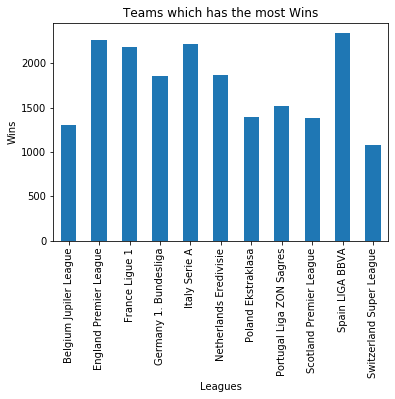

In [112]:
result.groupby('name')['winner'].count().plot(kind='bar', title='Teams which has the most Wins');
plt.xlabel('Leagues')
plt.ylabel('Wins')

#### As you can see, Spain Liga BBVA's teams improved the most. Second place is for England Premier League's teams. Third place is for Italy Serie A's teams.

### Which players had the most penalties?

In [113]:
#Merge df_player_att table and df_player:
result1 = pd.merge(df_player_att, df_player[['player_api_id', 'player_name']], on = 'player_api_id')
result1

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name
0,1,218353,505942,2016-02-18,67.0,71.0,49.0,44.0,71.0,61.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
1,2,218353,505942,2015-11-19,67.0,71.0,49.0,44.0,71.0,61.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
2,3,218353,505942,2015-09-21,62.0,66.0,49.0,44.0,71.0,61.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
3,4,218353,505942,2015-03-20,61.0,65.0,48.0,43.0,70.0,60.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye
4,5,218353,505942,2007-02-22,61.0,65.0,48.0,43.0,70.0,60.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30,83.0,85.0,84.0,77.0,59.0,89.0,...,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,Zvjezdan Misimovic
183974,183975,102359,39902,2009-02-22,78.0,80.0,74.0,76.0,53.0,84.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic
183975,183976,102359,39902,2008-08-30,77.0,80.0,74.0,71.0,53.0,84.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic
183976,183977,102359,39902,2007-08-30,78.0,81.0,74.0,64.0,57.0,86.0,...,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic


In [114]:
ps.sqldf('SELECT DISTINCT player_name, penalties FROM result1 ORDER BY penalties DESC')

,player_name,penalties
0,Rickie Lambert,96.0
1,Andrea Pirlo,95.0
2,Mario Balotelli,95.0
3,Paul Scholes,95.0
4,Rickie Lambert,95.0
...,...,...
38167,Stefan Deloose,5.0
38168,Vincent Plante,5.0
38169,Vlada Avramov,5.0
38170,Jed Steer,3.0


#### As you can see, Rickie Lambert had the most penalties with 96,  Andrea Pirlo = 95, Mario Balotelli = 95 and so on. 

### What team attributes lead to the most victories?

In [115]:
#Looking for spain teams since they are the most powerful
def sql_all(team_api_id):
    return ps.sqldf('SELECT * FROM df_team_att WHERE  team_api_id = ' + team_api_id)
sql_all('8634')

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,119,241,8634,2010-02-22 00:00:00.000000,42,Balanced,48.607362,Little,30,Short,...,70,Lots,Free Form,70,High,30,Contain,70,Wide,Offside Trap
1,120,241,8634,2011-02-22 00:00:00.000000,43,Balanced,48.607362,Little,34,Mixed,...,68,Lots,Free Form,67,High,43,Press,68,Wide,Cover
2,121,241,8634,2012-02-22 00:00:00.000000,24,Slow,48.607362,Little,25,Short,...,54,Normal,Free Form,66,Medium,63,Press,66,Normal,Cover
3,122,241,8634,2013-09-20 00:00:00.000000,35,Balanced,48.607362,Little,32,Short,...,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
4,123,241,8634,2014-09-19 00:00:00.000000,35,Balanced,35.000000,Normal,32,Short,...,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
5,124,241,8634,2015-09-10 00:00:00.000000,36,Balanced,35.000000,Normal,51,Mixed,...,56,Normal,Free Form,61,Medium,65,Press,65,Normal,Cover


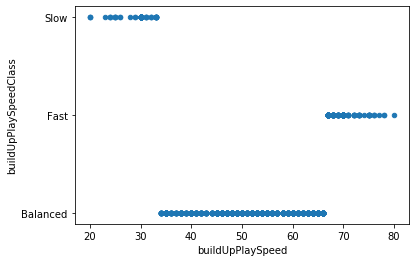

In [116]:
df_team_att.plot(x='buildUpPlaySpeed', y='buildUpPlaySpeedClass', kind='scatter');

#### This scatter plot clearly highlights that fast speed is important. However as you can see, balanced speed is also fine in order to win in match.

In [117]:
#Looking for england teams since they are powerful also:
sql_all('10260')

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,807,11,10260,2010-02-22 00:00:00.000000,70,Fast,48.607362,Little,45,Mixed,...,65,Normal,Free Form,40,Medium,50,Press,40,Normal,Cover
1,808,11,10260,2011-02-22 00:00:00.000000,65,Balanced,48.607362,Little,40,Mixed,...,70,Lots,Free Form,45,Medium,45,Press,65,Normal,Cover
2,809,11,10260,2012-02-22 00:00:00.000000,46,Balanced,48.607362,Little,54,Mixed,...,55,Normal,Organised,40,Medium,50,Press,56,Normal,Cover
3,810,11,10260,2013-09-20 00:00:00.000000,46,Balanced,48.607362,Little,38,Mixed,...,37,Normal,Organised,49,Medium,49,Press,56,Normal,Cover
4,811,11,10260,2014-09-19 00:00:00.000000,46,Balanced,34.000000,Normal,54,Mixed,...,56,Normal,Organised,42,Medium,41,Press,56,Normal,Cover
5,812,11,10260,2015-09-10 00:00:00.000000,38,Balanced,42.000000,Normal,44,Mixed,...,40,Normal,Organised,54,Medium,53,Press,56,Normal,Cover


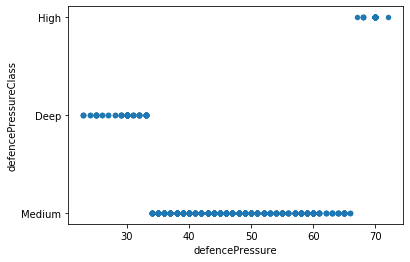

In [118]:
df_team_att.plot(x='defencePressure', y='defencePressureClass', kind='scatter');

#### Looks like defence pressure should be medium as there are lots mentions in medium.

In [119]:
#Looking for italy teams since they are powerful too:
sql_all('9885')

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,625,45,9885,2010-02-22 00:00:00.000000,45,Balanced,48.607362,Little,35,Mixed,...,70,Lots,Free Form,50,Medium,35,Press,70,Wide,Offside Trap
1,626,45,9885,2011-02-22 00:00:00.000000,65,Balanced,48.607362,Little,50,Mixed,...,50,Normal,Organised,55,Medium,55,Press,35,Normal,Cover
2,627,45,9885,2012-02-22 00:00:00.000000,50,Balanced,48.607362,Little,35,Mixed,...,50,Normal,Organised,35,Medium,55,Press,35,Normal,Cover
3,628,45,9885,2013-09-20 00:00:00.000000,39,Balanced,48.607362,Little,33,Short,...,72,Lots,Free Form,66,Medium,67,Double,36,Normal,Cover
4,629,45,9885,2014-09-19 00:00:00.000000,26,Slow,47.000000,Normal,24,Short,...,72,Lots,Organised,23,Deep,67,Double,36,Normal,Cover
5,630,45,9885,2015-09-10 00:00:00.000000,50,Balanced,35.000000,Normal,20,Short,...,80,Lots,Organised,35,Medium,65,Press,35,Normal,Cover


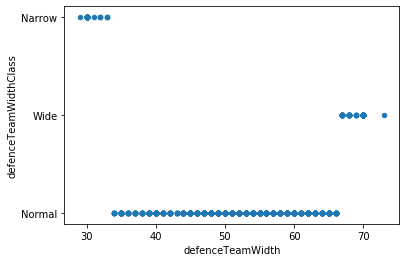

In [120]:
df_team_att.plot(x='defenceTeamWidth', y='defenceTeamWidthClass', kind='scatter');

#### Ok, it seems like normal team width is good for a team.  

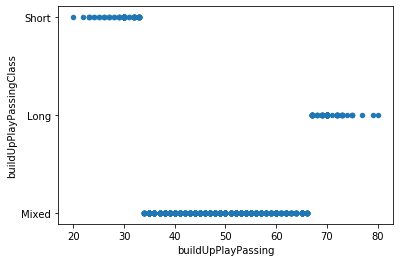

In [121]:
df_team_att.plot(x='buildUpPlayPassing', y='buildUpPlayPassingClass', kind='scatter');

#### Mixed passes are a good ones. 

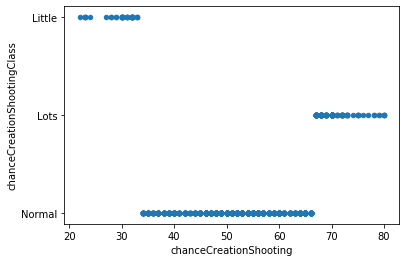

In [122]:
df_team_att.plot(x='chanceCreationShooting', y='chanceCreationShootingClass', kind='scatter');

#### Chances creation of shoots in a match should be normal but for better score it has to be a lot. 

#### It seems to me that speed, passes are two of the attributes that proves the victory. Chances creation of shoots in a match are also one of the crucial ones. 

## Limitations and Challenges

#### I have viewed all the tables of this databse and realized that data is not clear. In fact, there are lots null values and one table has lots of columns which are very hard too read.
#### I have seen some players' names are not complete which mean they do not have any surnames or firstnames. 
#### Meanwhile teams' names are also the same problem. That is why, I have used ids but not the names and this had challenged me a lot. 

<a id='conclusions'></a>
## Conclusions

#### The best teams in Europe during 2008-2016 are Spain teams, England teams and Italy teams. The most powelful teams have won many games as my above codes said.

#### The most penalties are related to player Rickie Lambert with 96,  Andrea Pirlo = 95, Mario Balotelli = 95 and so on. You can see the rest above.

#### Every successful team has fast speed and a lot of passes. Apart form this, Chances creation of shoots in a match are also important ones. 

#### Refence: 
https://www.w3schools.com/sql/sql_distinct.asp
https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/
https://stackoverflow.com/questions/45865608/executing-an-sql-query-over-a-pandas-dataset
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
https://medium.com/jbennetcodes/how-to-rewrite-your-sql-queries-in-pandas-and-more-149d341fc53e
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
https://nces.ed.gov/nceskids/help/user_guide/graph/variables.asp